## Plot lab bathymetry

In [1]:
import cmocean as cmo
import matplotlib.cm as cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from netCDF4 import Dataset
import numpy as np
import seaborn as sns
import time
%matplotlib inline

In [258]:
insert_file = '/ocean/kramosmu/Building_canyon/BuildCanyon/Bathymetry/tank/BathyInsert03.nc'
spacing_file = '/ocean/kramosmu/Building_canyon/BuildCanyon/Bathymetry/tank/BathySpacing01.nc'
H = 9.2 # cm, max water level

with Dataset(insert_file, 'r') as nbl:
    X = 100*nbl.variables['X'][:]
    Y = 100*nbl.variables['Y'][:]
    depth = (100*nbl.variables['Bathymetry'][:])-H
with Dataset(spacing_file, 'r') as nbl:
    X_s = 100*nbl.variables['X'][:]
    Y_s = 100*nbl.variables['Y'][:]
    depth_s = (100*nbl.variables['Bathymetry'][:])-H

TH = np.arctan(Y/X)   
R = np.sqrt(X**2+Y**2)   

TH_s = np.arctan(Y_s/X_s) 
R_s = np.sqrt(X_s**2+Y_s**2)   



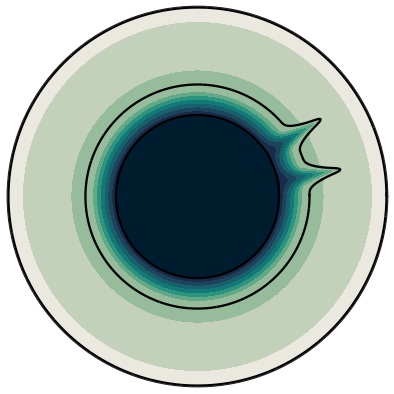

In [267]:
sns.set_context('talk')
sns.set_style('white')

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, polar=True)
ax.set_facecolor((0/255,29/255,48/255))
nlev=[nn for nn in np.array([0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2])-H]
levs=[nn for nn in np.array([0.1,6.9,8.49])-H]

for ii in range(21):
    ax.contourf(TH_s+(ii)*TH_s[-1,-1]+2*TH[-1,-1],R_s,depth_s,nlev, cmap=cmo.cm.tempo_r)
    ax.contour(TH_s+(ii)*TH_s[-1,-1]+2*TH[-1,-1],R_s,depth_s,levs, colors='k', linestyles='-')
ax.contourf(TH_s[:-100,:]+(ii+1)*TH_s[-1,-1]+2*TH[-1,-1],R_s[:-100,:],depth_s[:-100,:],nlev, cmap=cmo.cm.tempo_r)
ax.contour(TH_s[:-100,:]+(ii+1)*TH_s[-1,-1]+2*TH[-1,-1],R_s[:-100,:],depth_s[:-100,:],levs, colors='k', linestyles='-')
    
ax.contourf(TH,R,depth,nlev, cmap=cmo.cm.tempo_r)
ax.contour(TH,R,depth,levs, colors=['k'], linestyles='-')
ax.contourf(TH+TH[-1,-1],R,depth,nlev, cmap=cmo.cm.tempo_r)
ax.contour(TH+TH[-1,-1],R,depth,levs, colors=['k'], linestyles='-')

ax.set_rlim(0,49.7)
ax.set_rticks([])
ax.set_thetagrids([])
plt.savefig('figures/tank_bathy_only.eps', format='eps')


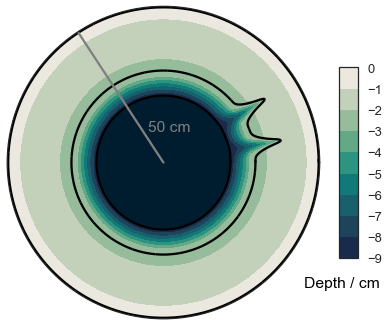

In [268]:
sns.set_context('talk')
sns.set_style('white')

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, polar=True)
ax.set_facecolor((0/255,29/255,48/255))

for ii in range(21):
    ax.contourf(TH_s+(ii)*TH_s[-1,-1]+2*TH[-1,-1],R_s,depth_s,nlev, cmap=cmo.cm.tempo_r)
    ax.contour(TH_s+(ii)*TH_s[-1,-1]+2*TH[-1,-1],R_s,depth_s,levs, colors='k', linestyles='-')
ax.contourf(TH_s[:-100,:]+(ii+1)*TH_s[-1,-1]+2*TH[-1,-1],R_s[:-100,:],depth_s[:-100,:],nlev, cmap=cmo.cm.tempo_r)
ax.contour(TH_s[:-100,:]+(ii+1)*TH_s[-1,-1]+2*TH[-1,-1],R_s[:-100,:],depth_s[:-100,:],levs, colors='k', linestyles='-')
    
mesh = ax.contourf(TH,R,depth,nlev, cmap=cmo.cm.tempo_r)
ax.contour(TH,R,depth,levs, colors=['k'], linestyles='-')
cb = plt.colorbar(mesh,ax=ax, shrink=0.5,aspect=10)

ax.contourf(TH+TH[-1,-1],R,depth,nlev, cmap=cmo.cm.tempo_r)
ax.contour(TH+TH[-1,-1],R,depth,levs, colors=['k'], linestyles='-')

ax.plot(np.ones(20)+20,np.linspace(0,49.5,20), '-',color='0.5')
ax.text(0.45,0.6,'50 cm',transform=ax.transAxes, color='0.5')
ax.text(0.95,0.1,'Depth / cm',transform=ax.transAxes, color='k')

ax.set_rlim(0,49.7)
ax.set_rticks([])
ax.set_thetagrids([])
plt.savefig('figures/tank_bathy_dims.eps', format='eps')


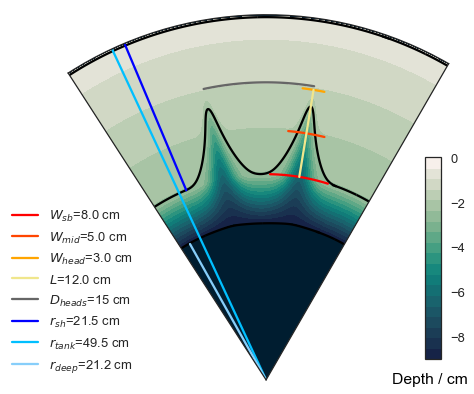

In [283]:
L = 12                   # m, Canyon length
arc_insert = 18.5 # 0.175 (most of the inserts are 17.5-18 cm)
r_tank = 49.5              # m, radius of the tank, ignore plexiglass step around the tank
r_deep = r_tank - 28.3 #0.275    # m, distance from deepest part of the slope to the centre of the tank
r_shelf = r_tank-21.5  # m, horizontal, cross-shelf distance to the shelf - the shelf is 22.3 cm long
# r_slope = 0.283-0.215 # m, horizontal distance from shelf-break to deep "ocean"
# r_head = r_shelf + L    

th_insert = arc_insert/r_tank # rad, angular width of the insert.

w_break = 8.0/r_shelf         # rad, canyon width at shelf break (in arc long)
w_mid = 5/(r_shelf + (L/2))           # rad, canyon width at mid-length
w_head = 3/(r_shelf + L)          # rad, canyon width near the head
width_f = 8.0/r_shelf         # rad, canyon width at shelf break (can't this just be w_break? )
# x_wall = width_f * 7          # rad, make total alongshore distance be 7 times the canyon width


fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, polar=True)
ax.set_facecolor((0/255,29/255,48/255))
levels = np.linspace(0.2-H,9.2-H,20)
nlev=[nn for nn in levels]
levs=[nn for nn in np.array([0.1,6.8,8.49])-H]

for ii in range(21):
    ax.contourf(TH_s+(ii)*TH_s[-1,-1]+2*TH[-1,-1],R_s,depth_s,nlev, cmap=cmo.cm.tempo_r)
    ax.contour(TH_s+(ii)*TH_s[-1,-1]+2*TH[-1,-1],R_s,depth_s,levs, colors='k', linestyles='-')
ax.contourf(TH_s[:-100,:]+(ii+1)*TH_s[-1,-1]+2*TH[-1,-1],R_s[:-100,:],depth_s[:-100,:],nlev, cmap=cmo.cm.tempo_r)
ax.contour(TH_s[:-100,:]+(ii+1)*TH_s[-1,-1]+2*TH[-1,-1],R_s[:-100,:],depth_s[:-100,:],levs, colors='k', linestyles='-')

mesh = ax.contourf(TH,R,depth,nlev, cmap=cmo.cm.tempo_r)
ax.contour(TH,R,depth,levs, colors=['k'], linestyles='-')

cbar_ax = fig.add_axes([0.77, 0.18, 0.025, 0.4])
cb=fig.colorbar(mesh, cax=cbar_ax,ticks=[0,-2,-4,-6,-8])

ax.contourf(TH+TH[-1,-1],R,depth,nlev, cmap=cmo.cm.tempo_r)
ax.contour(TH+TH[-1,-1],R,depth,levs, colors=['k'], linestyles='-')

ax.plot(np.linspace(th_insert/2-w_break/2,th_insert/2+w_break/2,30),np.ones(30)*(r_shelf),
        '-', color='red', label=r'$W_{sb}$=%1.1f cm' %(w_break*r_shelf))
ax.plot(np.linspace(th_insert/2-w_mid/2,th_insert/2+w_mid/2,30),np.ones(30)*(r_shelf+L/2),
        '-', color='orangered', label=r'$W_{mid}$=%1.1f cm' %(w_mid*(r_shelf + (L/2)))) 
ax.plot(np.linspace(th_insert/2-w_head/2,th_insert/2+w_head/2,30),np.ones(30)*(r_shelf+L),
          '-', color='orange',label=r'$W_{head}$=%1.1f cm' %(w_head*(r_shelf + (L)) ))
ax.plot(np.ones(30)*(th_insert/2),np.linspace(r_shelf,r_shelf+L,30), '-', color='khaki', label=r'$L$=%1.1f cm' %L)
ax.plot(np.linspace(th_insert/2,3*th_insert/2,30),np.ones(30)*(r_shelf+L+0.5),
          '-', color='0.4',label=r'$D_{heads}$=15 cm')
ax.plot(np.ones(30)*2*th_insert,np.linspace(r_shelf, r_tank,30),
          '-', color='blue',label=r'$r_{sh}$=%1.1f cm' %(r_tank-r_shelf))
ax.plot(np.ones(30)*2.1*th_insert,np.linspace(0, r_tank,30),
          '-', color='deepskyblue',label=r'$r_{tank}$=%1.1f cm' %(r_tank))
ax.plot(np.ones(30)*2.3*th_insert,np.linspace(0, r_deep,30),
          '-', color='lightskyblue',label=r'$r_{deep}$=%1.1f cm' %(r_deep))


ax.set_rlim(0,49.7)
ax.set_rticks([])
ax.set_thetagrids([])
ax.set_thetamin(np.min(TH)*360/(2*np.pi)-10)
ax.set_thetamax(np.max(TH)*2*360/(2*np.pi)+10)
ax.set_theta_zero_location('N', offset=-20)
ax.legend(bbox_to_anchor=(0.2,0.5))
ax.text(0.85,0.01,'Depth / cm',transform=ax.transAxes, color='k')

plt.savefig('figures/canyons_dims.eps', format='eps')